In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(r"C:\Users\Niranjan\Desktop\Data Science\datasets\Naive Bayes dataset\sentiment labelled sentences\imdb_labelled.txt", delimiter= '\t', header=None)
sms_raw.columns = ['message','spam']

In [14]:
print(sms_raw.count())
print(sms_raw.head(5))
sms_raw.dropna()
print(sms_raw.count())

message    748
spam       748
dtype: int64
                                             message  spam
0  A very, very, very slow-moving, aimless movie ...     0
1  Not sure who was more lost - the flat characte...     0
2  Attempting artiness with black & white and cle...     0
3       Very little music or anything to speak of.       0
4  The best scene in the movie was when Gerardo i...     1
message    748
spam       748
dtype: int64


In [27]:
#sms_raw.where(sms_raw['spam'] == 1)
sms_raw.query('spam == 1').head(5)

,message,spam,perfect,best,great,greatest,good,loved,adorable,cool,...,10,superb,superbly,classic,worth,terrific,liked,beautiful,brillant,treat
4,The best scene in the movie was when Gerardo i...,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,Saw the movie today and thought it was a good ...,1,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,Loved the casting of Jimmy Buffet as the scien...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,And those baby owls were adorable.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,The movie showed a lot of Florida at it's best...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
keywords = ['perfect', 
'best', 
'great', 
'greatest', 
'good', 
'loved', 
'adorable', 
'cool', 
'gem', 
'perfect', 
'masterpiece', 
'promote', 
'interesting', 
'interest', 
'10', 
'superb', 
'superbly', 
'classic', 
'worth', 
'terrific', 
'liked', 
'beautiful', 
'brillant', 
'treat']


for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [16]:
sms_raw

,message,spam,perfect,best,great,greatest,good,loved,adorable,cool,...,10,superb,superbly,classic,worth,terrific,liked,beautiful,brillant,treat
0,"A very, very, very slow-moving, aimless movie ...",0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,"The rest of the movie lacks art, charm, meanin...",0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,Wasted two hours.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,Saw the movie today and thought it was a good ...,1,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,A bit predictable.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,Loved the casting of Jimmy Buffet as the scien...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
sms_raw.query('treat == True')

,message,spam,perfect,best,great,greatest,good,loved,adorable,cool,...,10,superb,superbly,classic,worth,terrific,liked,beautiful,brillant,treat
90,"Also, it's a real treat to see Anthony Quinn p...",1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


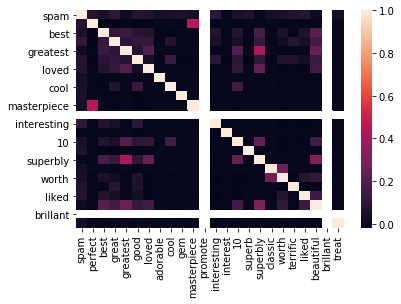

In [26]:
sns.heatmap(sms_raw.corr())

In [18]:
data = sms_raw[keywords]
target = sms_raw['spam']

from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 298


In [28]:
data

,perfect,best,great,greatest,good,loved,adorable,cool,gem,perfect,...,10,superb,superbly,classic,worth,terrific,liked,beautiful,brillant,treat
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,